### Data Set Information
The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand. 
This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.


### Attribute Information:

It includes 7 features known prior to post publication and 12 features for evaluating post impact (see Tables 2 and 3 from Moro et al., 2016 - complete reference in the 'Citation Request')


#### Classification

In [46]:
#importing the packages
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score 
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [22]:
#Reading the data
df = pd.read_csv("./input/dataset_Facebook.csv", delimiter = ";")

In [23]:
#Getting total number of columns
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [24]:
#Define some features from given columns of data set
features = ["Category","Page total likes","Type","Post Month","Post Hour","Post Weekday","Paid"]
df[features].head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [25]:
#Taking some column as outcomes from data set
outcomes=  ["Lifetime Post Total Reach",
            "Lifetime Post Total Impressions",
            "Lifetime Engaged Users",
            "Lifetime Post Consumers",
            "Lifetime Post Consumptions",
            "Lifetime Post Impressions by people who have liked your Page",
            "Lifetime Post reach by people who like your Page",
            "Lifetime People who have liked your Page and engaged with your post",
            "comment",
            "like",
            "share",
            "Total Interactions"]

df[outcomes].head()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [26]:
#print the Last three column
print(df[outcomes[-3:]].head())

     like  share  Total Interactions
0    79.0   17.0                 100
1   130.0   29.0                 164
2    66.0   14.0                  80
3  1572.0  147.0                1777
4   325.0   49.0                 393


In [27]:
# convert a string variable to a categorical one
df[["Type"]] = df[["Type"]].apply(LabelEncoder().fit_transform)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [28]:
#Dropping the NaN values from data set
df = df.dropna()

In [29]:
#Taking another set of column from data set 
outcomes_of_interest = ["Lifetime Post Consumers","like"]

In [32]:
n_bins = 10    #Declare some parameter value
X_df = df[features].copy()   #Define another Data Frame for features columns
y_df = df[outcomes_of_interest].copy()    #Define a Data Frame for outcomes_of_interest columns 

In [33]:
#Quantile-based discretization function. 
#Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
bins = pd.qcut(y_df[outcomes_of_interest[0]].values,n_bins)   

bins

[(8.999, 190.2], (1105.2, 1612.8], (8.999, 190.2], (646.8, 857.4], (388.4, 478.6], ..., (646.8, 857.4], (646.8, 857.4], (478.6, 555.0], (555.0, 646.8], (555.0, 646.8]]
Length: 495
Categories (10, interval[float64]): [(8.999, 190.2] < (190.2, 302.8] < (302.8, 388.4] < (388.4, 478.6] ... (646.8, 857.4] < (857.4, 1105.2] < (1105.2, 1612.8] < (1612.8, 11328.0]]

In [34]:
y_df = df[outcomes_of_interest].copy()    #define a Data Frame for outcomes_of_interest values

y_df[outcomes_of_interest[0]] = bins    #Assign the value of bins to outcomes_of_interest values

# convert a string variable to a categorical one
y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)  
#Print the first five values
print(y_df.head())

   Lifetime Post Consumers  like
0                        0    73
1                        8   113
2                        0    61
3                        6   252
4                        3   205


In [35]:
#Getting X values
X = X_df.values
#Getting y values
y = y_df.values.T[0]
#Define some range
y_df['id'] = range(1, len(df) + 1)

y_df.head()

,Lifetime Post Consumers,like,id
0,0,73,1
1,8,113,2
2,0,61,3
3,6,252,4
4,3,205,5


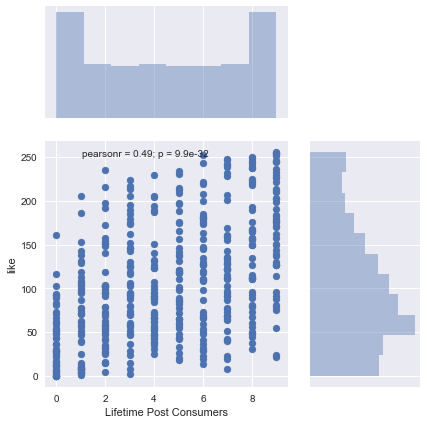

In [36]:
#Plotting the Lifetime Post Consumers using seaborn
sns_plot = sns.jointplot(x="Lifetime Post Consumers", y="like", data=y_df, ratio = 2)

In [38]:
#importing the packages for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
#An extremely randomized tree classifier.
#Extra-trees differ from classic decision trees in the way they are built. 
#When looking for the best split to separate the samples of a node into two groups, 
#random splits are drawn for each of the max_features randomly 
#selected features and the best split among those is chosen.

clf = ExtraTreesClassifier(n_estimators = 2000,max_depth = 4)

In [40]:
#The dummy classifier gives you a measure of "baseline"
#performance--i.e. the success rate one should expect to achieve even 
#if simply guessing.
dummy_clf = DummyClassifier()
#Gettting cross val score
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))
#Fit the Model
dummy_clf.fit(X,y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [47]:
#print the mean and standared deviation
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#Predict for dummyclassifier
print("Dummy ACC: %0.2f)" % (accuracy_score(y,dummy_clf.predict(X))))

ACC: 0.27 (+/- 0.11)
Dummy ACC: 0.10)


In [48]:
#ETs are generally cheaper to train from a 
#computational point of view but can grow much bigger

#Define ExtraTreesClassifier 
clf = ExtraTreesClassifier(n_estimators = 20000,max_depth = 4)
#fit the Model
clf.fit(X,y)
#Finding the accuracy score
print(accuracy_score(y,clf.predict(X)))

0.478787878788


In [50]:
#Getting features importance 
importances = clf.feature_importances_
#finding standared deviation
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
#Printing the indices
print(indices)

[3 1 2 0 6 5 4]


In [51]:
# Print the feature ranking value
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],importances[indices[f]]))

Feature ranking:
1. Post Month (0.304850)
2. Page total likes (0.253747)
3. Type (0.221016)
4. Category (0.076024)
5. Paid (0.051629)
6. Post Weekday (0.046743)
7. Post Hour (0.045990)


(0, 0.51294652263922336)

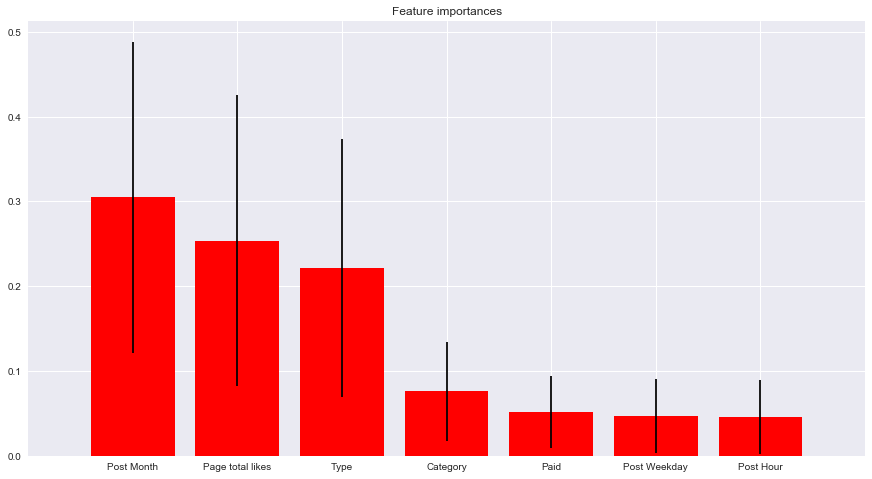

In [52]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [53]:
from sklearn.metrics import confusion_matrix
import itertools

#Method to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [54]:
# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

Normalized confusion matrix


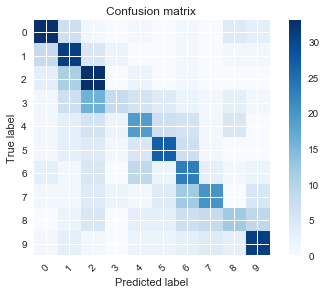

In [55]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,title='Confusion matrix')

#### Regression

In [63]:
#Define a data frame
X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()
#Getting some category value
cat_features = ["Category","Type","Paid"]
X_df = pd.get_dummies(X_df, columns = cat_features)
#print the first five value
print(X_df.head()[["Category_1", "Category_2","Category_3"]])

   Category_1  Category_2  Category_3
0           0           1           0
1           0           1           0
2           0           0           1
3           0           1           0
4           0           1           0


In [64]:
#Getting X and y variable values
X = X_df.values
y = y_df.values.T[0]
y = (y-y.min())/(y.max() - y.min())

In [65]:
#Define a sample parameter
n_test = 100
n_repeat = 1000
#Define some Classifier
estimator = RandomForestRegressor()
# Compute predictions
y_predicts = np.zeros((n_repeat, len(X)))

In [66]:
#Predict the values by repeatation upto len(X)
for i in range(n_repeat):    
    sample  = np.random.choice(range(len(X)),replace = True,size = len(X))
    
    train_ids = sample[:-n_test]
    test_ids  = sample[-n_test:]
    test_ids = np.setdiff1d(test_ids,train_ids)
    if(len(test_ids) == 0 ):
        continue
    X_train,y_train = X[train_ids], y[train_ids]
    X_test, y_test = X[test_ids], y[test_ids]  
    #Fitting the Model
    estimator.fit(X_train, y_train)
    #Predict the value
    y_predict = estimator.predict(X_test)
    y_predicts[i,test_ids] = y_predict

In [67]:
#Gettting bias value
y_bias = (y - np.mean(y_predicts, axis=0)) **2
#getting error
y_error = ((y - y_predicts) **2).mean()
y_var = np.var(y_predicts, axis=0, ddof = 1)
#Print the mean value
print(np.mean(y_bias) +  np.mean(y_var))

0.0107036498241


In [68]:
clf_type = "Decision tree"
#Print all values of Decision Tree
print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var)))

Decision tree: 0.0107 (error) = 0.0100 (bias^2) + 0.0007 (var)


In [69]:
#Print all values of Decision Tree
print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
          "+ {3:.4f} (var)".format(clf_type,
                                                      np.mean(y_bias) + np.mean(y_var),
                                                      np.mean(y_bias),
                                                      np.mean(y_var)))

Decision tree: 0.0107 ((bias^2) + (var)) = 0.0100 (bias^2) + 0.0007 (var)


In [71]:
from sklearn.linear_model import SGDRegressor, BayesianRidge
#Define a classifier
clf = BayesianRidge(normalize = True)
#Dummy classifier
dummy_clf = DummyRegressor()
#Getting score value
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(mse))
#Getting dummy score
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring = make_scorer(mse))

In [72]:
#Print Mean square error
print("MSE: %0.8f (+/- %0.8f)" % (scores.mean(), scores.std()))
print("Dummy MSE: %0.8f (+/- %0.8f)" % (dummy_scores.mean(), dummy_scores.std()))

MSE: 0.00479575 (+/- 0.00511744)
Dummy MSE: 0.00616020 (+/- 0.00521769)


In [74]:
#Define Another Classifier
clf =BayesianRidge()
#shape of X and y
print(X.shape,y.shape)

(495, 13) (495,)


In [75]:
stdy = y #declare another variable
#Fit the Model
clf.fit(X,stdy)
#Finding Mean square error
print(mse(stdy,clf.predict(X)))

0.00442525939709
